In [59]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from math import log2, log10, ceil
import json
from zipfile import ZipFile, ZIP_DEFLATED
from io import TextIOWrapper
import numpy as np

In [3]:
%matplotlib inline

In [14]:
matplotlib.rcParams["font.size"] = 20

def get_ax():
    fig, ax = plt.subplots(figsize=(8,6))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(1, 10)
    return ax

def scale_ax():
    ax = get_ax()
    ax.set_xlabel("N (data size)")
    ax.set_ylabel("Steps")
    return ax

def plot_func(ax, f, C=1, color="k", label="work"):
    start = ax.get_xlim()[0]
    width = ax.get_xlim()[1] - ax.get_xlim()[0]
    s = pd.Series([],dtype=float)
    for i in range(100):
        N = start + width * (i+1)/100
        s[N] = eval(f)
    s.sort_index().plot(ax=ax, color=color, linewidth=3, label=label)
    plt.text(s.index[-1], s.iloc[-1], f, verticalalignment='center')
    
def upper_bound(ax, order, C=1, minN=None):
    f = order
    if C != 1:
        f = "C * (%s)" % order
    plot_func(ax, f, C=C, color="r", label="upper bound")
    if minN != None:
        ax.axvspan(minN, ax.get_xlim()[1], color='0.85')
    ax.legend(frameon=False)


# Exercise 1

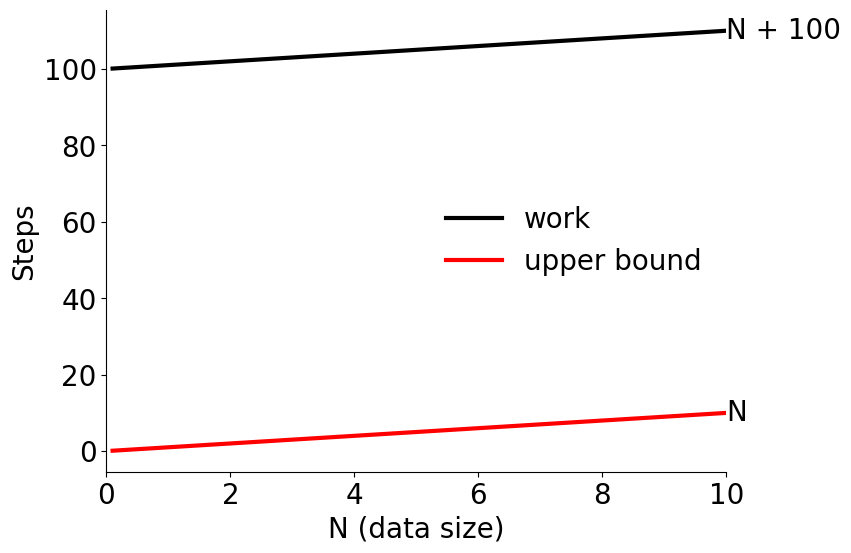

In [15]:
ax = scale_ax()
ax.set_xlim(0, 10) # TODO: change upper bound
plot_func(ax, "N + 100")

upper_bound(ax, order="N", C=1, minN=None) # TODO: pass C and minN

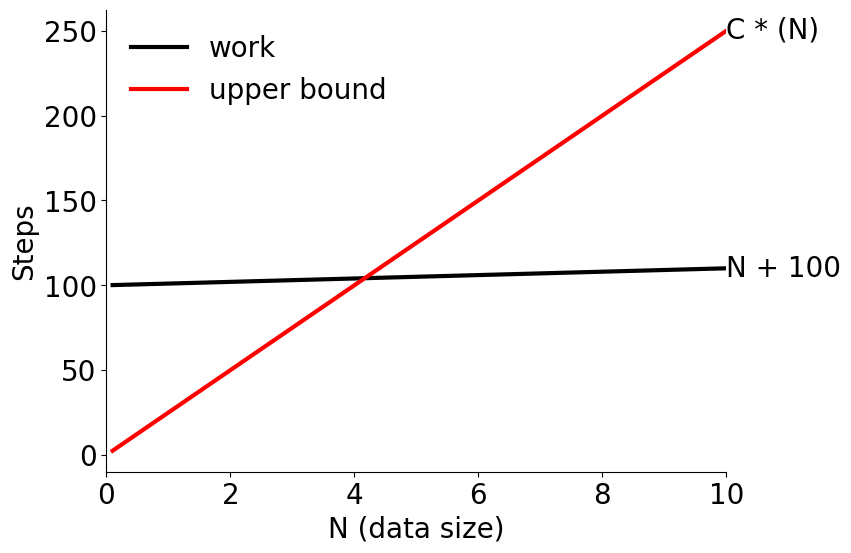

In [16]:
ax = scale_ax()
ax.set_xlim(0, 10) # TODO: change upper bound
plot_func(ax, "N + 100")

upper_bound(ax, order="N", C=25, minN=None) # TODO: pass C and minN

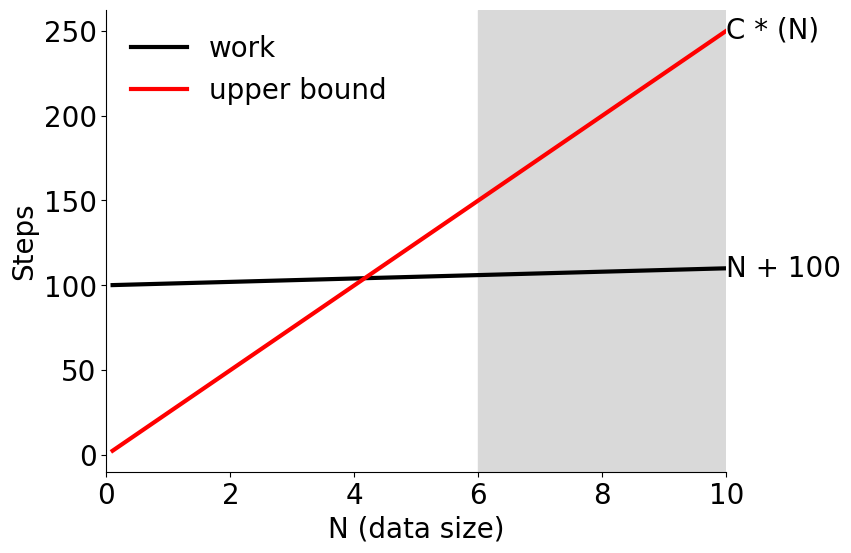

In [17]:
ax = scale_ax()
ax.set_xlim(0, 10) # TODO: change upper bound
plot_func(ax, "N + 100")

upper_bound(ax, order="N", C=25, minN=6) # TODO: pass C and minN

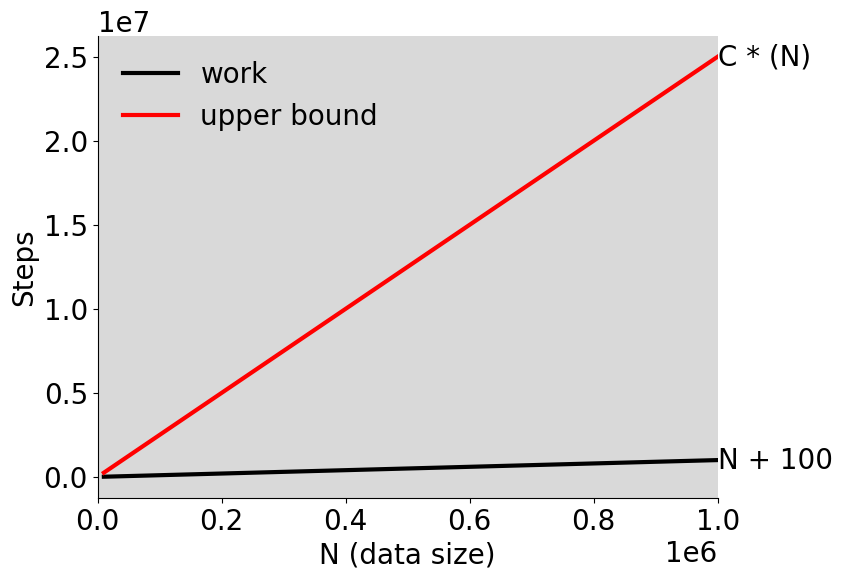

In [18]:
ax = scale_ax()
ax.set_xlim(0, 1e6) # 1 million
plot_func(ax, "N + 100")

upper_bound(ax, order="N", C=25, minN=6) # TODO: pass C and minN

# Exercise 2

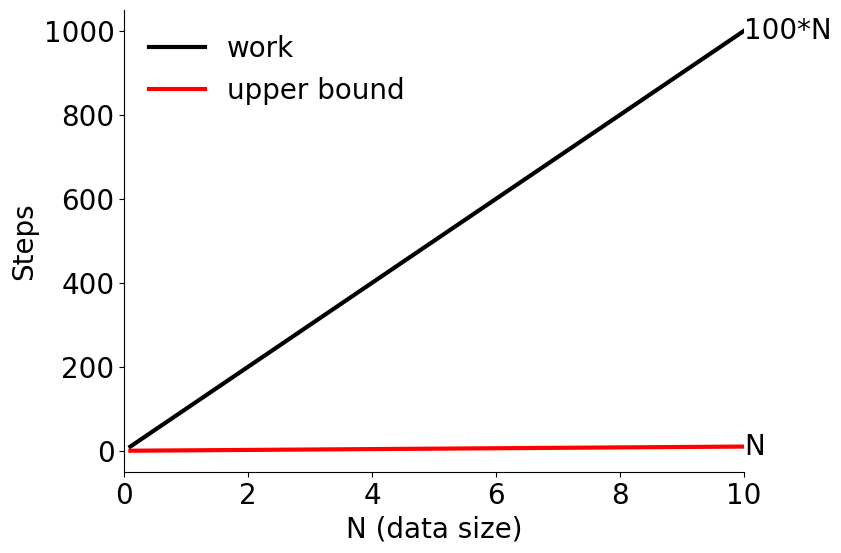

In [21]:
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "100*N")

upper_bound(ax, order="N")

We don't need to set minN for this and the default value of C is fine 

# Exercise 3

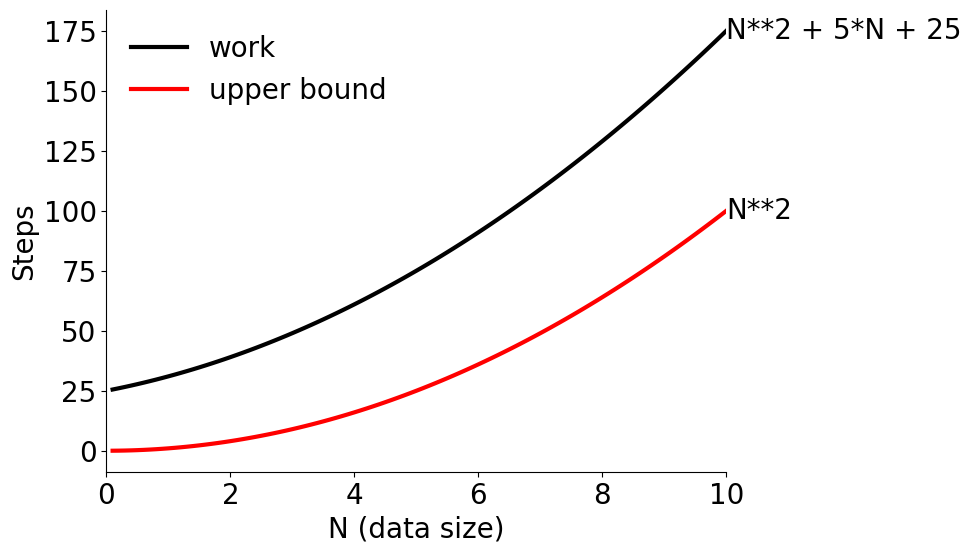

In [22]:
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "N**2 + 5*N + 25")

upper_bound(ax, order="N**2")

# Exercise 4

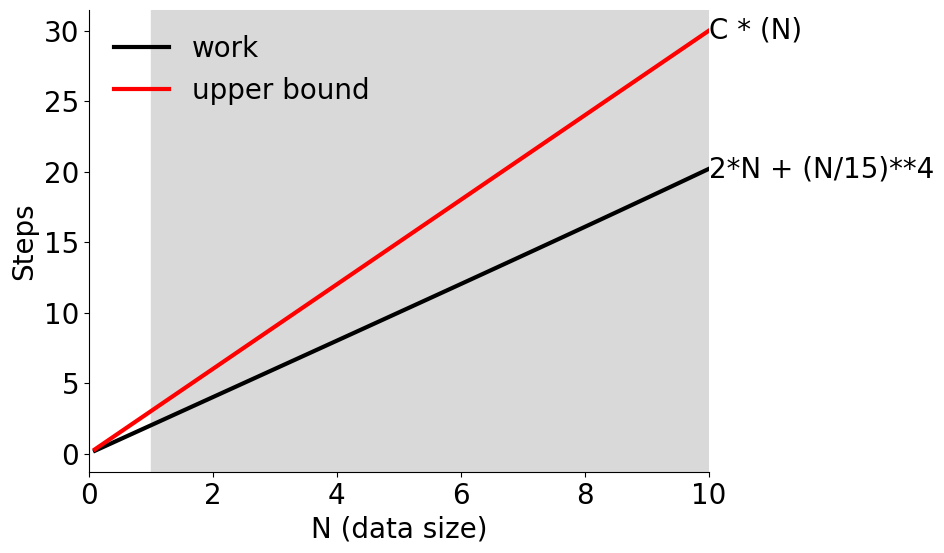

In [25]:
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "2*N + (N/15)**4")

upper_bound(ax, order="N", C=3, minN=1)

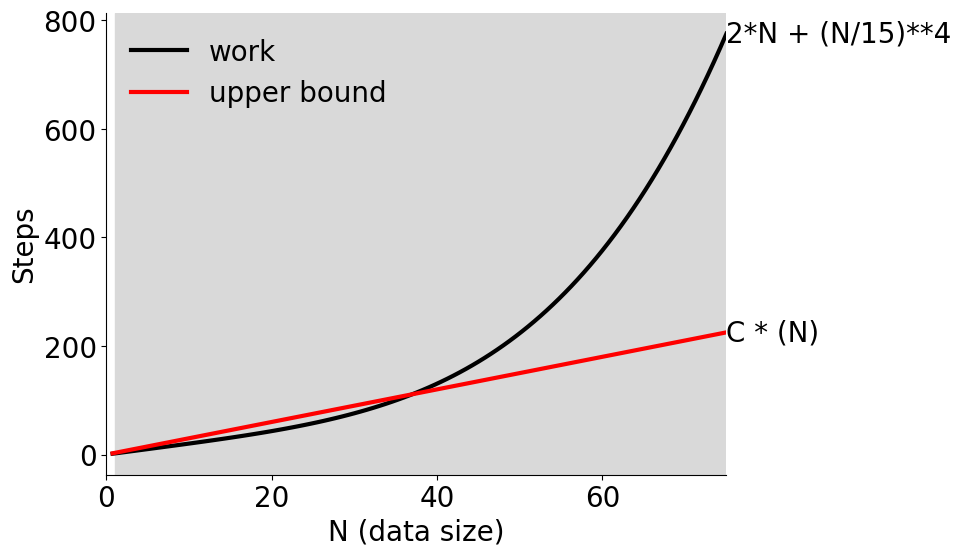

In [26]:
ax = scale_ax()
ax.set_xlim(0, 75)
plot_func(ax, "2*N + (N/15)**4")

upper_bound(ax, order="N", C=3, minN=1)

When I increase the limit to 75, 2\*N + (N/15)^4 shoots up and becomes greater than C\*N \
The order of 2\*N + (N/15)^4 is O(2^N)

# Exercise 5

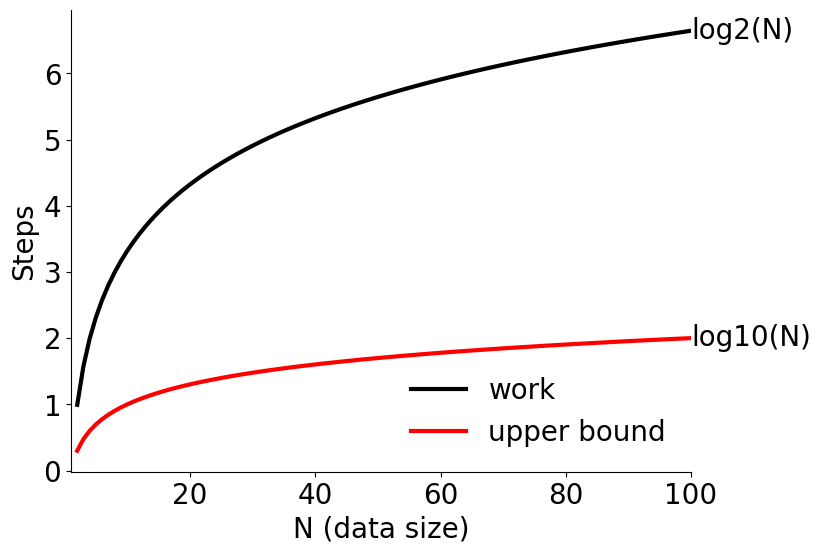

In [27]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "log2(N)")

upper_bound(ax, order="log10(N)")

# Exercise 6

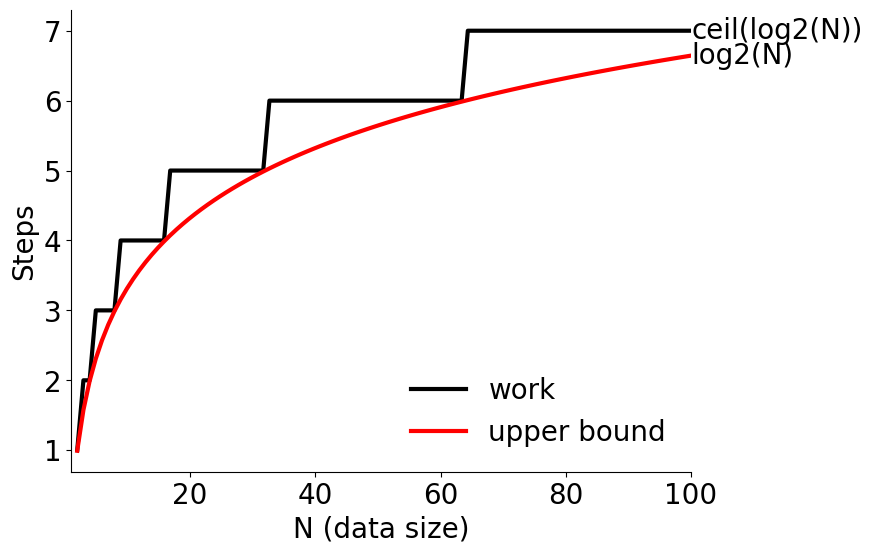

In [28]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "ceil(log2(N))")

upper_bound(ax, order="log2(N)")

# Exercise 7

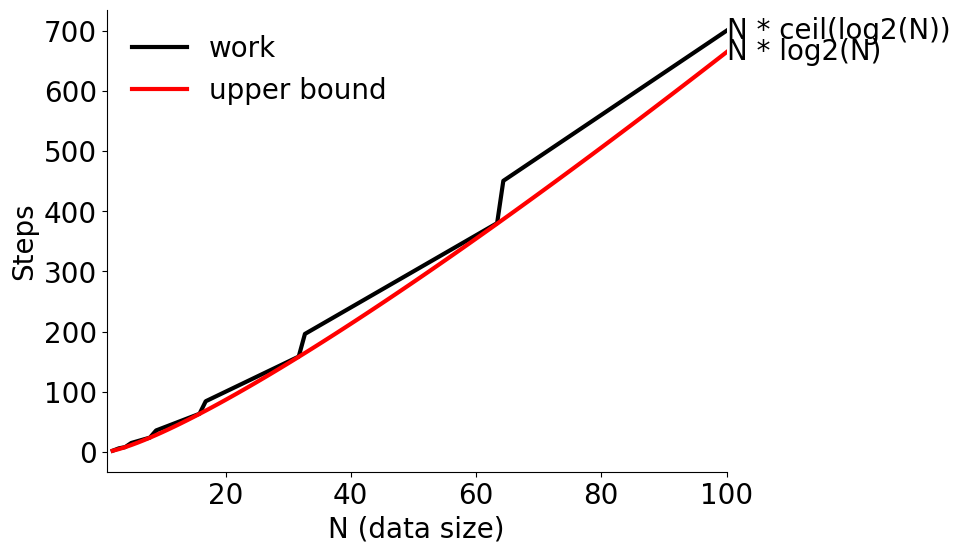

In [29]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "N * ceil(log2(N))")

upper_bound(ax, order="N * log2(N)")


# Exercise 8

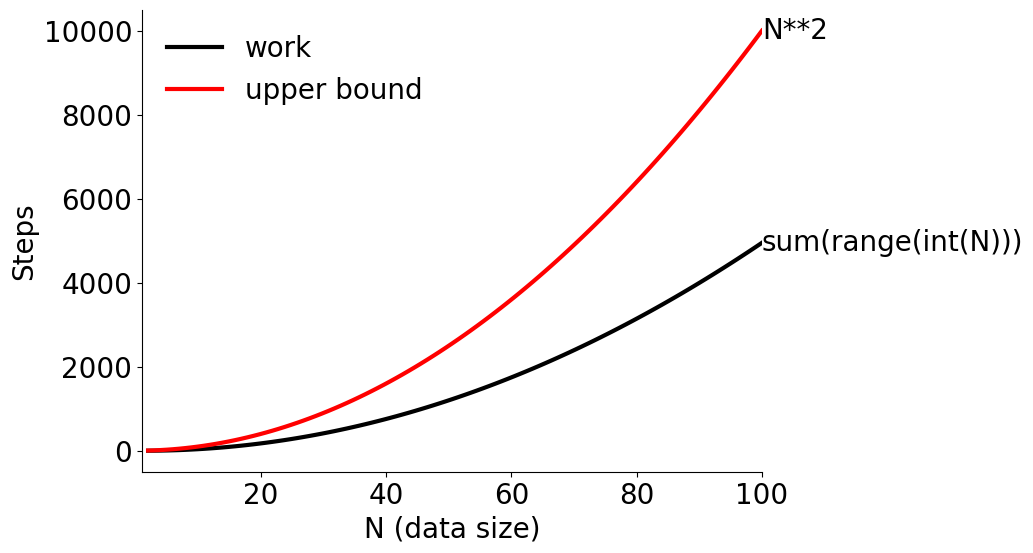

In [30]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "sum(range(int(N)))")

upper_bound(ax, order="N**2")

In [36]:
f = open("file.txt", "w")
f.write("line_1\n")
f.write("line_2\n")
f.close() # you need the parentheses, even without arguments!

In [37]:
!ls

README.md  big-o  file.txt  files-json	files-zip  lab3.ipynb  loans


In [38]:
!cat file.txt

line_1
line_2


In [39]:
!touch dog.json

In [40]:
f = open("dog.json")
input1 = f.read()
input2 = f.read()
f.close()

In [41]:
type(input1)

str

In [42]:
print(input1)

{
    "name": "Fido",
    "age": 1
}




In [43]:
print(input2)

In [44]:
f = open("dog.json")
for line in f:
    print("LINE: " + line, end="")
f.close()

LINE: {
LINE:     "name": "Fido",
LINE:     "age": 1
LINE: }
LINE: 


In [45]:
f = open("dog.json")
lines = list(f)
f.close()

print("GOT", len(lines), "lines")


GOT 5 lines


In [46]:
with open("dog.json") as f:
    lines = list(f)
# f is automatically closed after the with block

In [48]:
with open("dog.json") as f:
    dog = json.load(f) # fixme

In [49]:
type(dog)

dict

In [53]:
data = '{"name": "Fido", "age": 1}'
dog = json.loads(data) # fixme

In [51]:
type(dog)

dict

In [55]:
with open("dog.json") as f:
    data = f.read()
    dog = json.loads(data) # fixme

In [56]:
type(dog)

dict

In [67]:
with open("hello.txt", "w") as f:
    f.write("hello world")

with ZipFile("example.zip", "w", compression=ZIP_DEFLATED) as zf:
    with zf.open("hello.txt", "w") as f:
        f.write(bytes("hello world", "utf-8"))
    with zf.open("ha.txt", "w") as f:
        f.write(bytes("ha"*10000, "utf-8"))
    with zf.open("bugs.csv", "w") as f:
        pd.DataFrame([["Mon",7], ["Tue",4], ["Wed",3], ["Thu",6], ["Fri",9]],
                     columns=["day", "bugs"]).to_csv(TextIOWrapper(f), index=False)


In [68]:
with ZipFile('example.zip') as zf:
    for info in zf.infolist():
        print(info)

<ZipInfo filename='hello.txt' compress_type=deflate filemode='?rw-------' file_size=11 compress_size=13>
<ZipInfo filename='ha.txt' compress_type=deflate filemode='?rw-------' file_size=20000 compress_size=39>
<ZipInfo filename='bugs.csv' compress_type=deflate filemode='?rw-------' file_size=39 compress_size=41>


In [69]:
with ZipFile('example.zip') as zf:
    for info in zf.infolist():
        orig_mb = info.file_size / (1024**2) # there are 1024**2 bytes in a MB
        ratio = info.file_size / info.compress_size
        s = "file {name:s}, {mb:.3f} MB (uncompressed), {ratio:.1f} compression ratio"
        print(s.format(name=info.filename, mb=orig_mb, ratio=ratio))

file hello.txt, 0.000 MB (uncompressed), 0.8 compression ratio
file ha.txt, 0.019 MB (uncompressed), 512.8 compression ratio
file bugs.csv, 0.000 MB (uncompressed), 1.0 compression ratio


In [70]:
orig = 0
comp = 0
for info in zf.infolist():
    orig = orig + info.file_size
    comp = comp + info.compress_size

orig/comp

215.59139784946237

In [72]:
with open("hello.txt", "r") as f:
    data1 = f.read()

with open("hello.txt", "rb") as f:
    data2 = f.read()

print(type(data1), type(data2))

<class 'str'> <class 'bytes'>


In [73]:
with open("hello.txt", "rb") as f:
    tio = TextIOWrapper(f)
    data3 = tio.read()
print(type(data3))

<class 'str'>


In [74]:
with ZipFile('example.zip') as zf:
    with zf.open("hello.txt", "r") as f:
        print(f.read())

b'hello world'


In [75]:
with ZipFile('example.zip') as zf:
    with zf.open("hello.txt", "r") as f:
        tio = TextIOWrapper(f)
        print(tio.read())

hello world


In [76]:
with ZipFile('example.zip') as zf:
    with zf.open("bugs.csv") as f:
         df = pd.read_csv(f)
df

,day,bugs
0,Mon,7
1,Tue,4
2,Wed,3
3,Thu,6
4,Fri,9
